Task 1 : To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.  

Import Libraries

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


Define the Reduction Function

In [4]:
def reduce_intensity_levels(img_array, levels):
    """
    Reduce intensity levels of an image array to 'levels'.
    'levels' must be a power of 2 and less than or equal to 256.
    """
    assert (levels & (levels - 1) == 0) and levels <= 256, "Levels must be a power of 2 and <= 256"
    
    factor = 256 // levels  # e.g., for levels=8, factor=32
    quantized_img = (img_array // factor) * factor
    return quantized_img.astype(np.uint8)


Load Image

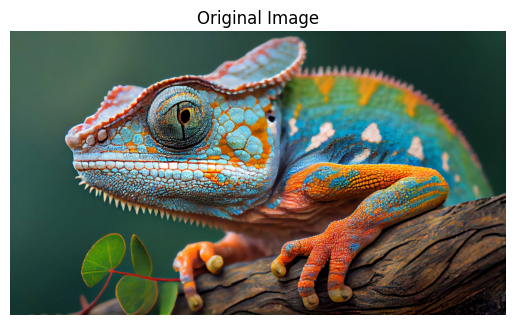

In [5]:
image_path = '../data/input_image.jpg'  # Change this if your image name is different

# Load the image and convert to grayscale
img = Image.open(image_path).convert('RGB')
img_array = np.array(img)

# Display the original image
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()


Set Desired Intensity Levels

In [6]:
desired_levels = 8  # Try 2, 4, 8, 16, 32, 64, 128, 256


Apply Intensity Reduction

In [7]:
reduced_img_array = reduce_intensity_levels(img_array, desired_levels)

# Convert the result back to PIL Image
reduced_img = Image.fromarray(reduced_img_array)


Show Original vs Reduced Image

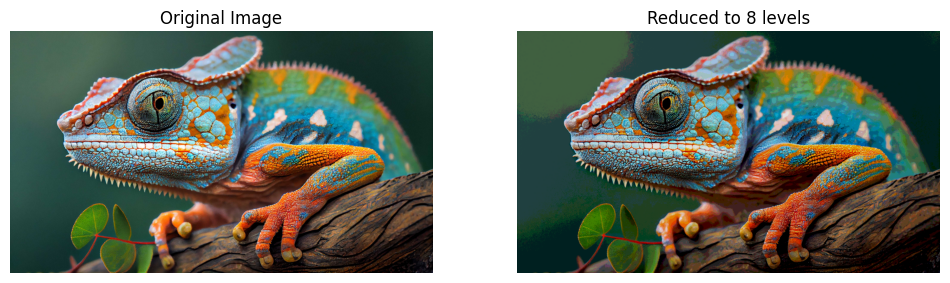

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Reduced to {desired_levels} levels")
plt.imshow(reduced_img_array)
plt.axis('off')

plt.show()


Save Output Image

In [9]:
output_dir = '../outputs/task1'
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, f'reduced_{desired_levels}_levels.jpg')
reduced_img.save(output_path)

print(f"Saved reduced image at: {output_path}")


Saved reduced image at: ../outputs/task1\reduced_8_levels.jpg
